<a href="https://colab.research.google.com/github/Jorgecuenca1/Vision-computadora-I/blob/main/TP3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TRABAJO PRACTICO 3:**
1. ENCONTRAR EL LOGOTIPO DE LA GASEOSA DENTRO DE LAS IMAGENES PREVISTAS.

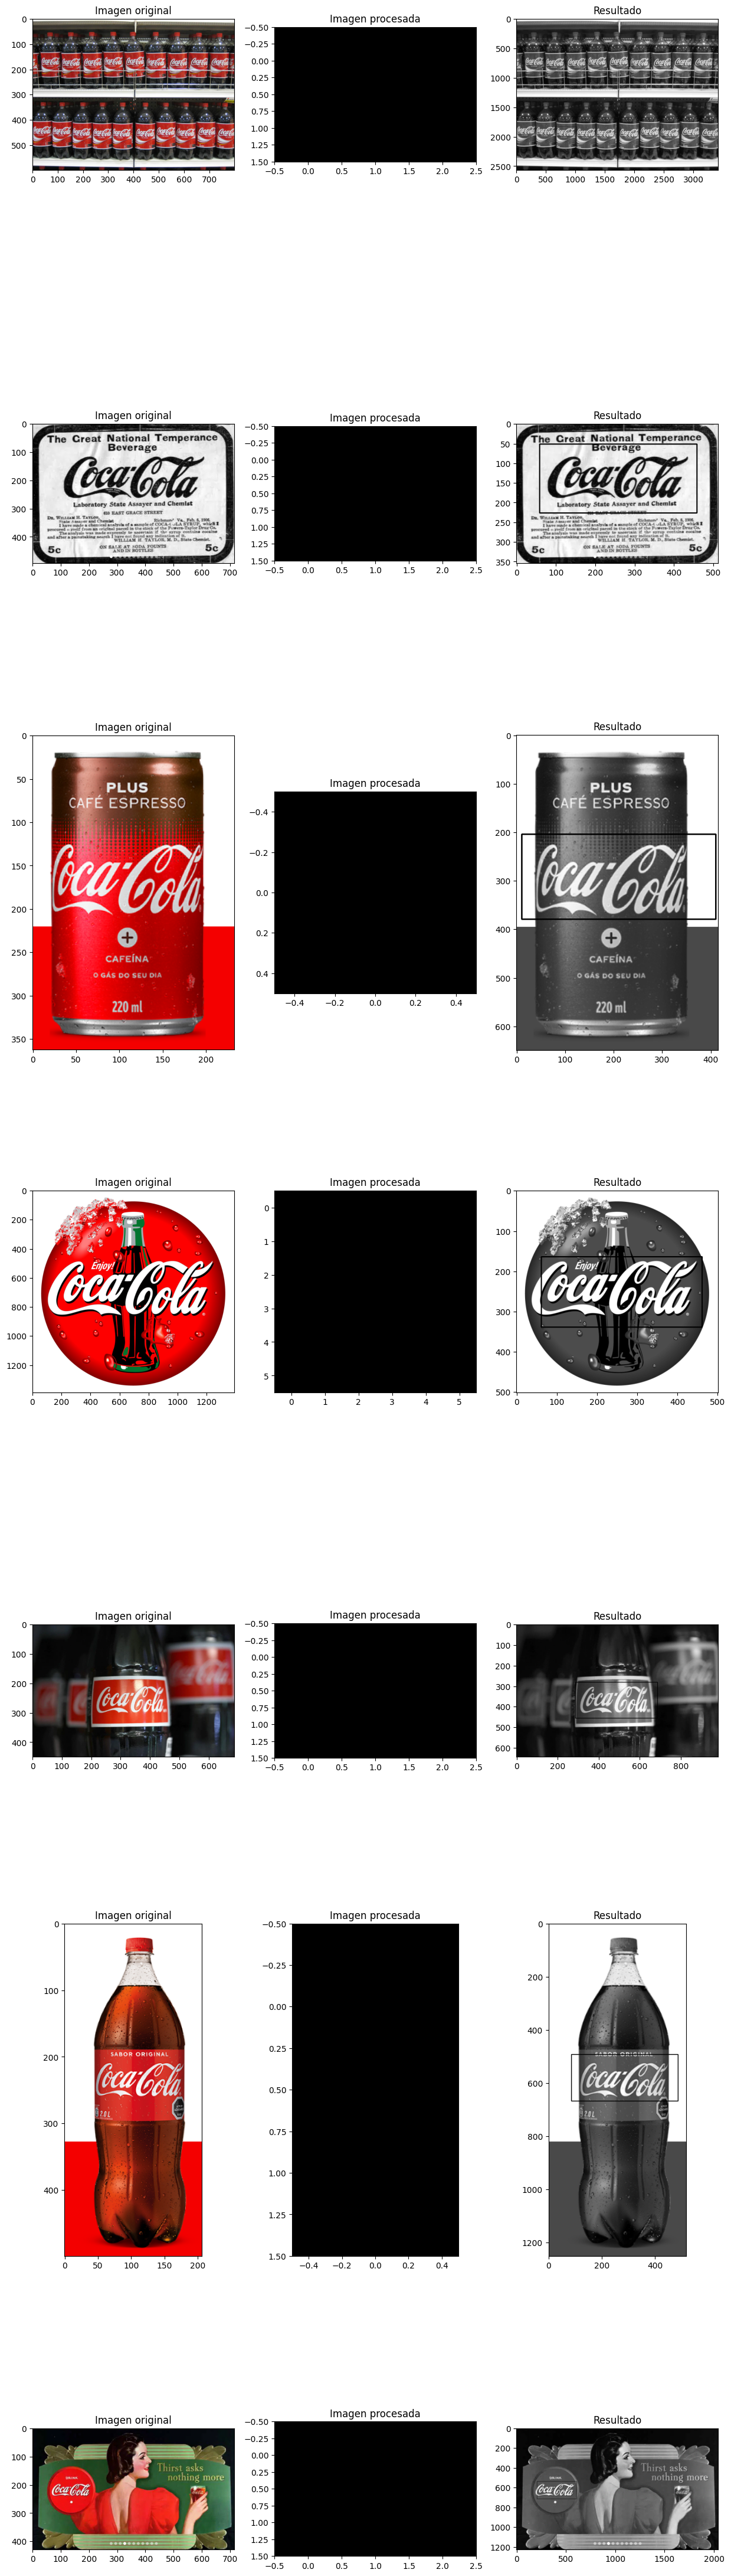

In [110]:
#importa librerias
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
#Se define un directorio, se cargan imágenes y se crea una lista de objetivos. Se lee un patrón de imagen.
directorio = "/content"
imagenes = os.listdir(directorio)
imagenes = imagenes[1:-1]
del imagenes[1]
template = cv2.imread('/content/pattern.png', cv2.IMREAD_GRAYSCALE)
objetivos= []
for file in imagenes:
    filepath = os.path.join(directorio, file)
    objetivos.append(cv2.cvtColor(cv2.imread(filepath, cv2.IMREAD_COLOR), cv2.COLOR_BGR2RGB))
#El código crea una figura con varias subfiguras y, para cada objetivo en la lista de objetivos, 
#busca la mejor coincidencia con la plantilla usando diferentes escalas y técnicas de procesamiento
# de imágenes. Las variables se inicializan como "None".

fig, axs = plt.subplots(len(objetivos), 3, figsize=(15,60))

for i, objetivo in enumerate(objetivos):  
    template_c = cv2.Canny(template, 50, 200)
    output = objetivo.copy()
    coords = None
    map = None
    resultado = None
    mejor_match = None
    mejor_escala = None
    
#Busca template en objetivos de distinto tamaño usando matching template y muestra resultados en subplot.
    for scale in np.linspace(0.005, 5.0, 15)[::-1]:

        objetivo_gray = cv2.cvtColor(objetivo, cv2.COLOR_RGB2GRAY)    
        rescaled_objetivo = cv2.resize(objetivo_gray, (int(objetivo_gray.shape[1]*scale), int(objetivo_gray.shape[0]*scale)), interpolation=cv2.INTER_AREA)

        objetivo_gauss = cv2.GaussianBlur(rescaled_objetivo, (7, 7), 11)
        tadap = cv2.adaptiveThreshold(objetivo_gauss,100,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,21,21)

        rescaled_objetivo_c = cv2.Canny(tadap, 240, 250)
        
        if rescaled_objetivo.shape[0] <= template.shape[0] or rescaled_objetivo.shape[1] <= template.shape[1]:
            continue      
        res = cv2.matchTemplate(rescaled_objetivo_c, template_c, cv2.TM_CCOEFF)
        min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

        if mejor_match is None or max_val > mejor_match:
            mejor_match = max_val
            mejor_escala = scale
            coords = max_loc
            map = res
            resultado = rescaled_objetivo.copy()

    top_left = coords
    w, h = template.shape[::-1]
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv2.rectangle(resultado, top_left, bottom_right, (0, 255, 0), 2)

    # MOstramo el resultado, comparado con la imagen original
    axs[i, 0].imshow(objetivo)
    axs[i, 0].set_title('Imagen original')
    axs[i, 1].imshow(rescaled_objetivo_c, cmap='gray')
    axs[i, 1].set_title('Imagen procesada')
    axs[i, 2].imshow(resultado, cmap='gray')
    axs[i, 2].set_title('Resultado')
    
plt.show()


**  Conclusión:**
  Este código carga imágenes desde un directorio y una imagen patrón, y busca el patrón en cada imagen del directorio utilizando la técnica de coincidencia de plantilla. Luego muestra las imágenes originales, las imágenes procesadas y los resultados de coincidencia de plantillas en subplots para cada imagen del directorio. Se utilizan funciones de procesamiento de imágenes como Canny, GaussianBlur y adaptiveThreshold para mejorar las imágenes antes de aplicar la coincidencia de plantillas.[texto del vínculo](https://)

2. Planer y validaar un algoritmo para multiples deteccones en la imagen multi.png

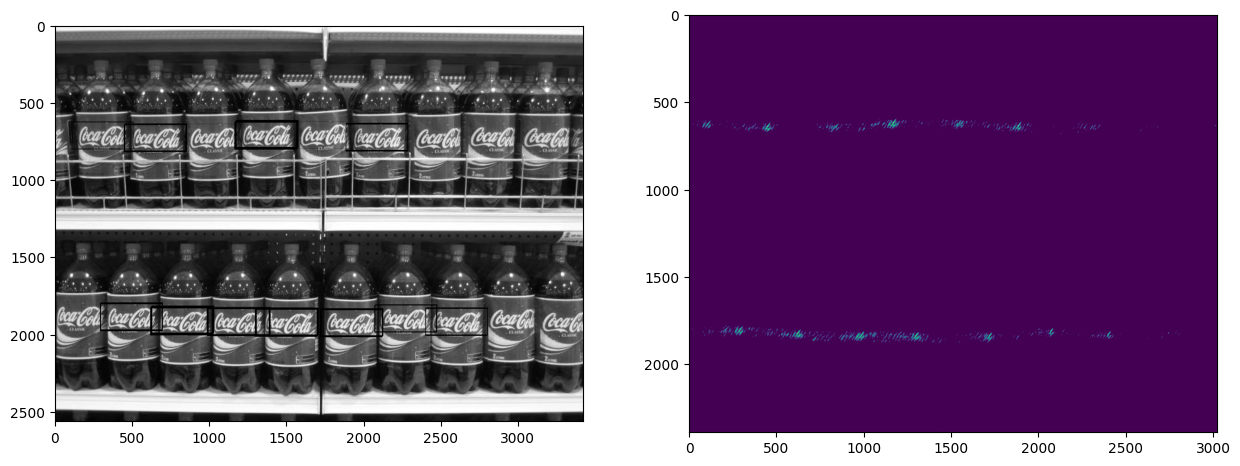

In [111]:
#definicion de vaeables de procesamiento
fig, axs = plt.subplots(1, 2, figsize=(15,60))

if True:

    imagen = objetivos[0]
    template_c = cv2.Canny(template, 50, 200)   
    output = imagen.copy()
    coords = None
    map = None
    resultado = None
    mejor_match = None
    mejor_escala = None
#Este código realiza una búsqueda 
#de plantilla en varias escalas de una imagen, aplicando una serie de operaciones de preprocesamiento.
    for scale in np.linspace(0.005, 5.0, 15)[::-1]:

        imagen_gray = cv2.cvtColor(imagen, cv2.COLOR_RGB2GRAY)       
        rescaled_imagen = cv2.resize(imagen_gray, (int(imagen_gray.shape[1]*scale), int(imagen_gray.shape[0]*scale)), interpolation=cv2.INTER_AREA)
        imagen_gauss = cv2.GaussianBlur(rescaled_imagen, (7, 7), 11)
        tadap = cv2.adaptiveThreshold(imagen_gauss,100,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,21,21)
        rescaled_imagen_c = cv2.Canny(tadap, 240, 250)
     
        if rescaled_imagen.shape[0] <= template.shape[0] or rescaled_imagen.shape[1] <= template.shape[1]:
            continue        
        res = cv2.matchTemplate(rescaled_imagen_c, template_c, cv2.TM_CCORR_NORMED)
        min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

        if mejor_match is None or max_val > mejor_match:
            mejor_match = max_val
            mejor_escala = scale
            coords = max_loc
            map = res
            resultado = rescaled_imagen.copy()

    top_left = coords
    w, h = template.shape[::-1]

    filtered_map = map*(map>0.07)

    loc = np.where( filtered_map>0.1)
    for pt in zip(*loc[::-1]):
       cv2.rectangle(resultado, pt, (pt[0] + w, pt[1] + h), (0, 255, 0), 1)

    axs[0].imshow(resultado, cmap='gray')
    axs[1].imshow(filtered_map)


Este código muestra un ejemplo de coincidencia de plantilla utilizando la biblioteca OpenCV. En la primera línea se crea una figura con dos subplots, uno para la imagen original y otro para la imagen procesada. A continuación, se procesa la imagen de destino, se calcula la coincidencia de plantilla para varias escalas y se busca el mejor resultado. Se dibuja un rectángulo en la ubicación de la coincidencia encontrada en la imagen de destino y se muestran la imagen procesada y el resultado de la coincidencia de plantilla en los subplots. La biblioteca OpenCV se utiliza para realizar la mayoría de las operaciones de procesamiento de imágenes.

3. Generalizar el algoritmo del item 2 para todas las imagenes

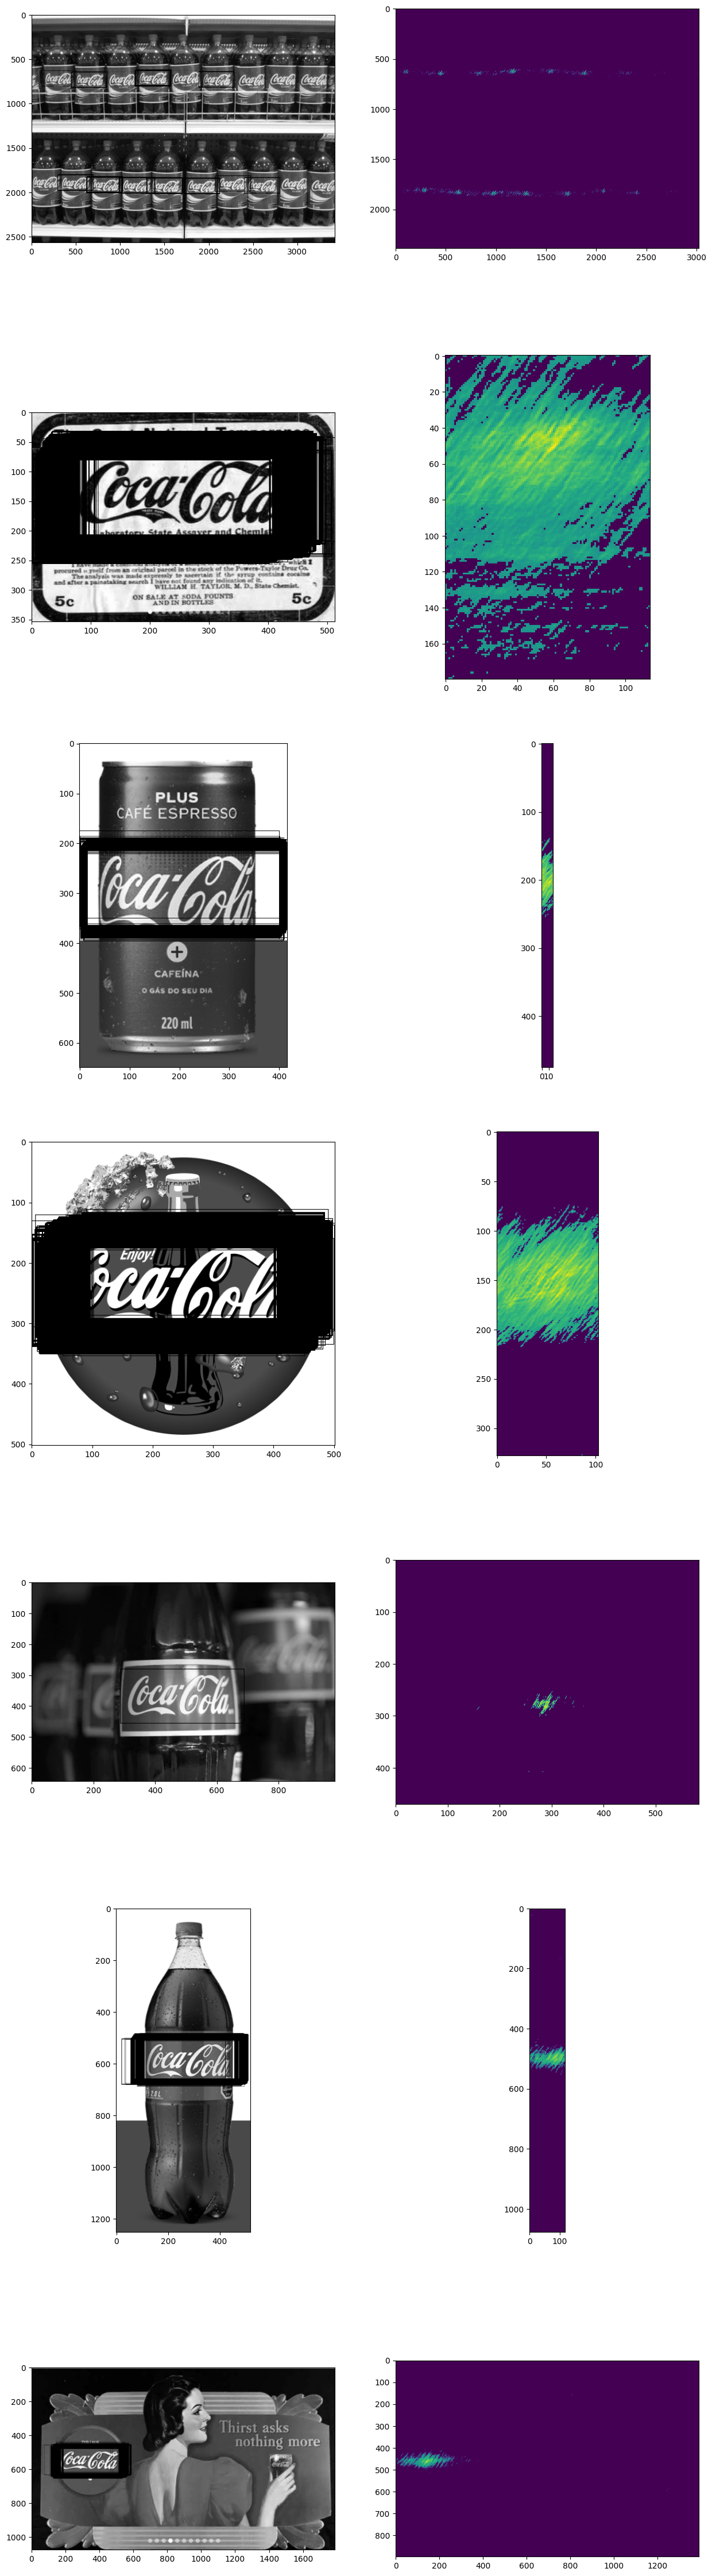

In [109]:
#lo mismo que lo anterior pero para todo el listado de imagenes
fig, axs = plt.subplots(len(objetivos), 2, figsize=(15,60))

for i, objetivo in enumerate(objetivos):  
    template_c = cv2.Canny(template, 50, 200)   
    output = objetivo.copy()
    coords = None
    map = None
    resultado = None
    mejor_match = None
    mejor_escala = None

    for scale in np.linspace(0.005, 5.0, 15)[::-1]:
        objetivo_gray = cv2.cvtColor(objetivo, cv2.COLOR_RGB2GRAY)       
        rescaled_objetivo = cv2.resize(objetivo_gray, (int(objetivo_gray.shape[1]*scale), int(objetivo_gray.shape[0]*scale)), interpolation=cv2.INTER_AREA)
        objetivo_gauss = cv2.GaussianBlur(rescaled_objetivo, (7, 7), 11)
        tadap = cv2.adaptiveThreshold(objetivo_gauss,100,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,21,21)
        rescaled_objetivo_c = cv2.Canny(tadap, 240, 250)
        
        if rescaled_objetivo.shape[0] <= template.shape[0] or rescaled_objetivo.shape[1] <= template.shape[1]:
            continue        
        res = cv2.matchTemplate(rescaled_objetivo_c, template_c, cv2.TM_CCORR_NORMED)
        min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

        if mejor_match is None or max_val > mejor_match:
            mejor_match = max_val
            mejor_escala = scale
            coords = max_loc
            map = res
            resultado = rescaled_objetivo.copy()

    top_left = coords
    w, h = template.shape[::-1]

    filtered_map = map*(map>0.07)

    loc = np.where( filtered_map>0.1)
    for pt in zip(*loc[::-1]):
       cv2.rectangle(resultado, pt, (pt[0] + w, pt[1] + h), (0, 255, 0), 1)

    axs[i, 0].imshow(resultado, cmap='gray')
    axs[i, 1].imshow(filtered_map)
    


Este código también utiliza la biblioteca OpenCV y Matplotlib para buscar una imagen objetivo en una lista de imágenes de destino utilizando una plantilla predefinida.

Primero, se crea una figura con subtramas para cada imagen de destino y dos columnas para mostrar la imagen encontrada y el mapa de coincidencia respectivamente.

Luego, el bucle for recorre cada imagen de destino en la lista de imágenes y realiza la búsqueda de la imagen objetivo utilizando una escala y un umbral adaptativo. El código es similar al explicado anteriormente.

Después de encontrar la imagen objetivo en la imagen de destino, se crea un rectángulo alrededor de la imagen objetivo en la imagen encontrada y se muestra en la primera columna de la subtrama correspondiente.

Finalmente, se muestra el mapa de coincidencia en la segunda columna de la subtrama correspondiente.

En resumen, este código busca la imagen objetivo en una lista de imágenes de destino y muestra los resultados en una figura con subtramas.